# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as XGBRegressor
import joblib

In [2]:
np.random.seed(42)

def generate_sample_data(n_samples=1000):
    """
    Generate synthetic data for clothes drying time prediction.

    Parameters:
    n_samples (int): Number of samples to generate

    Returns:
    pandas.DataFrame: Synthetic dataset
    """
    # Weather features
    temperature = np.random.uniform(10, 40, n_samples)  # Temperature in Celsius
    humidity = np.random.uniform(30, 95, n_samples)     # Relative humidity in %
    wind_speed = np.random.uniform(0, 30, n_samples)    # Wind speed in km/h
    precipitation = np.random.uniform(0, 10, n_samples) # Precipitation in mm
    sunshine = np.random.uniform(0, 12, n_samples)      # Hours of sunshine

    # Clothes features
    fabric_types = ['cotton', 'polyester', 'wool', 'mixed']
    fabric = np.random.choice(fabric_types, n_samples)
    weight = np.random.uniform(0.5, 5, n_samples)       # Weight of clothes in kg

    # Generate drying time with some realistic relationships
    # More humidity, more drying time
    # Higher temperature, less drying time
    # More wind speed, less drying time
    # More precipitation, more drying time
    # More sunshine, less drying time
    # Heavier clothes, more drying time

    # Base drying time
    drying_time = 120 + 2 * humidity - 3 * temperature - 2 * wind_speed + \
                  10 * precipitation - 5 * sunshine + 30 * weight

    # Add fabric-specific effects
    fabric_effect = {
        'cotton': 20,
        'polyester': -20,
        'wool': 40,
        'mixed': 10
    }

    for idx, fab in enumerate(fabric):
        drying_time[idx] += fabric_effect[fab]

    # Add some random noise
    drying_time += np.random.normal(0, 15, n_samples)

    # Ensure drying time is positive
    drying_time = np.maximum(drying_time, 10)

    # Create DataFrame
    data = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'precipitation': precipitation,
        'sunshine': sunshine,
        'fabric': fabric,
        'weight': weight,
        'drying_time': drying_time
    })

    return data


# data = pd.read_csv('your_drying_time_data.csv')
data = generate_sample_data(1000)

Dataset Information:
Number of samples: 1000
Number of features: 7

Feature Statistics:
       temperature     humidity   wind_speed  precipitation     sunshine  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean     24.707697    62.956125    15.072172       4.903750     5.929264   
std       8.764121    18.992343     8.720226       2.864893     3.441719   
min      10.138961    30.209187     0.000349       0.006534     0.000369   
25%      17.079198    45.669828     7.840529       2.419008     2.939688   
50%      24.904221    63.717704    15.018418       4.842793     5.935177   
75%      32.329588    79.430229    22.773106       7.375408     8.879921   
max      39.991530    94.961892    29.934626       9.995577    11.972993   

            weight  drying_time  
count  1000.000000  1000.000000  
mean      2.738620   254.552386  
std       1.308074    77.269677  
min       0.517633    43.049030  
25%       1.595196   201.190775  
50%       2.749072   25

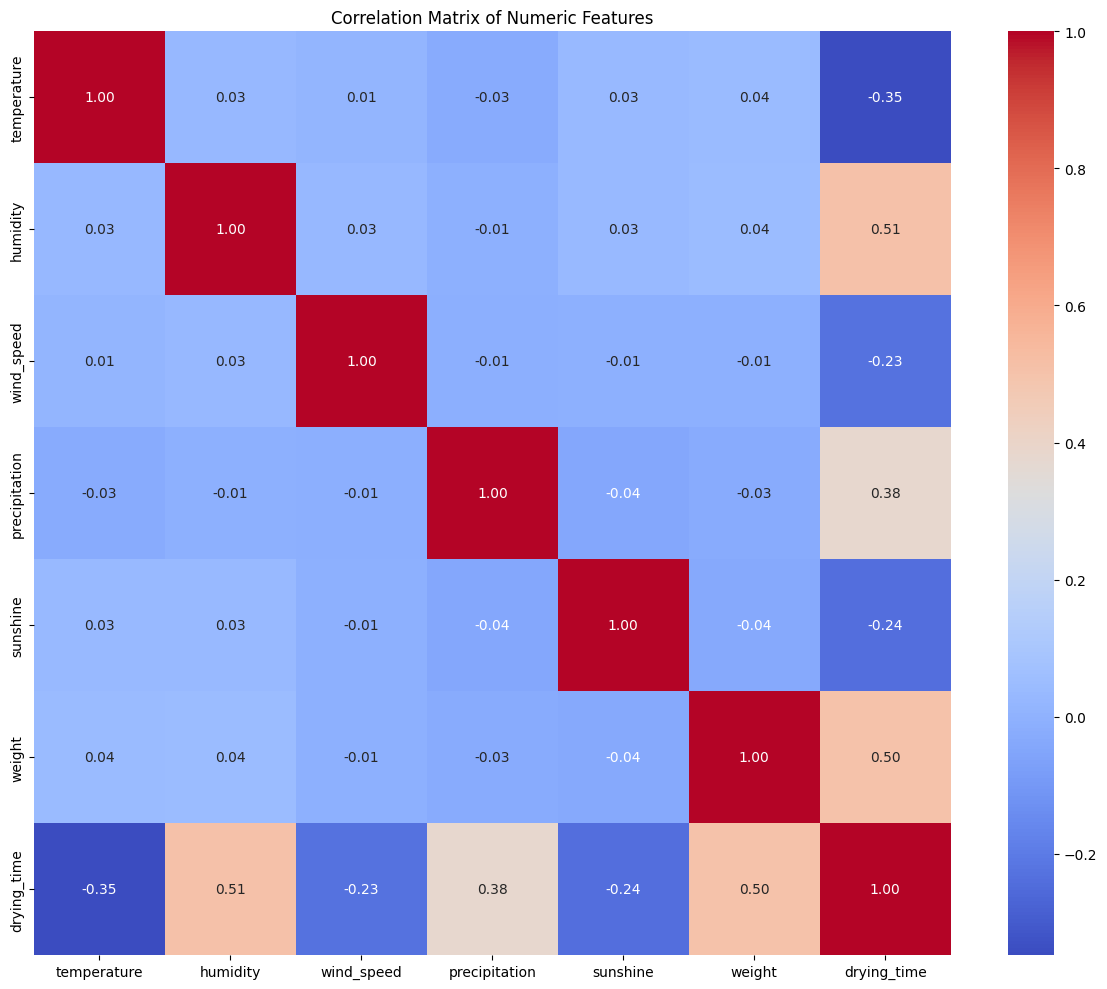

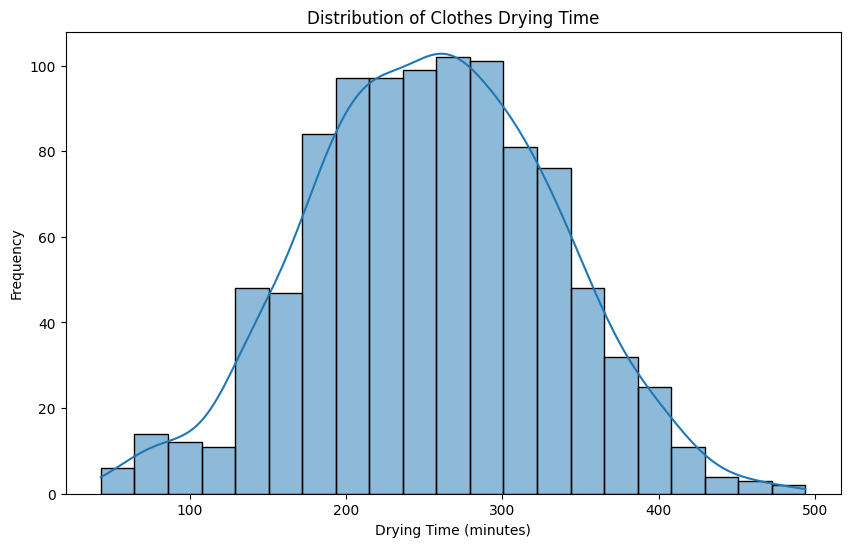

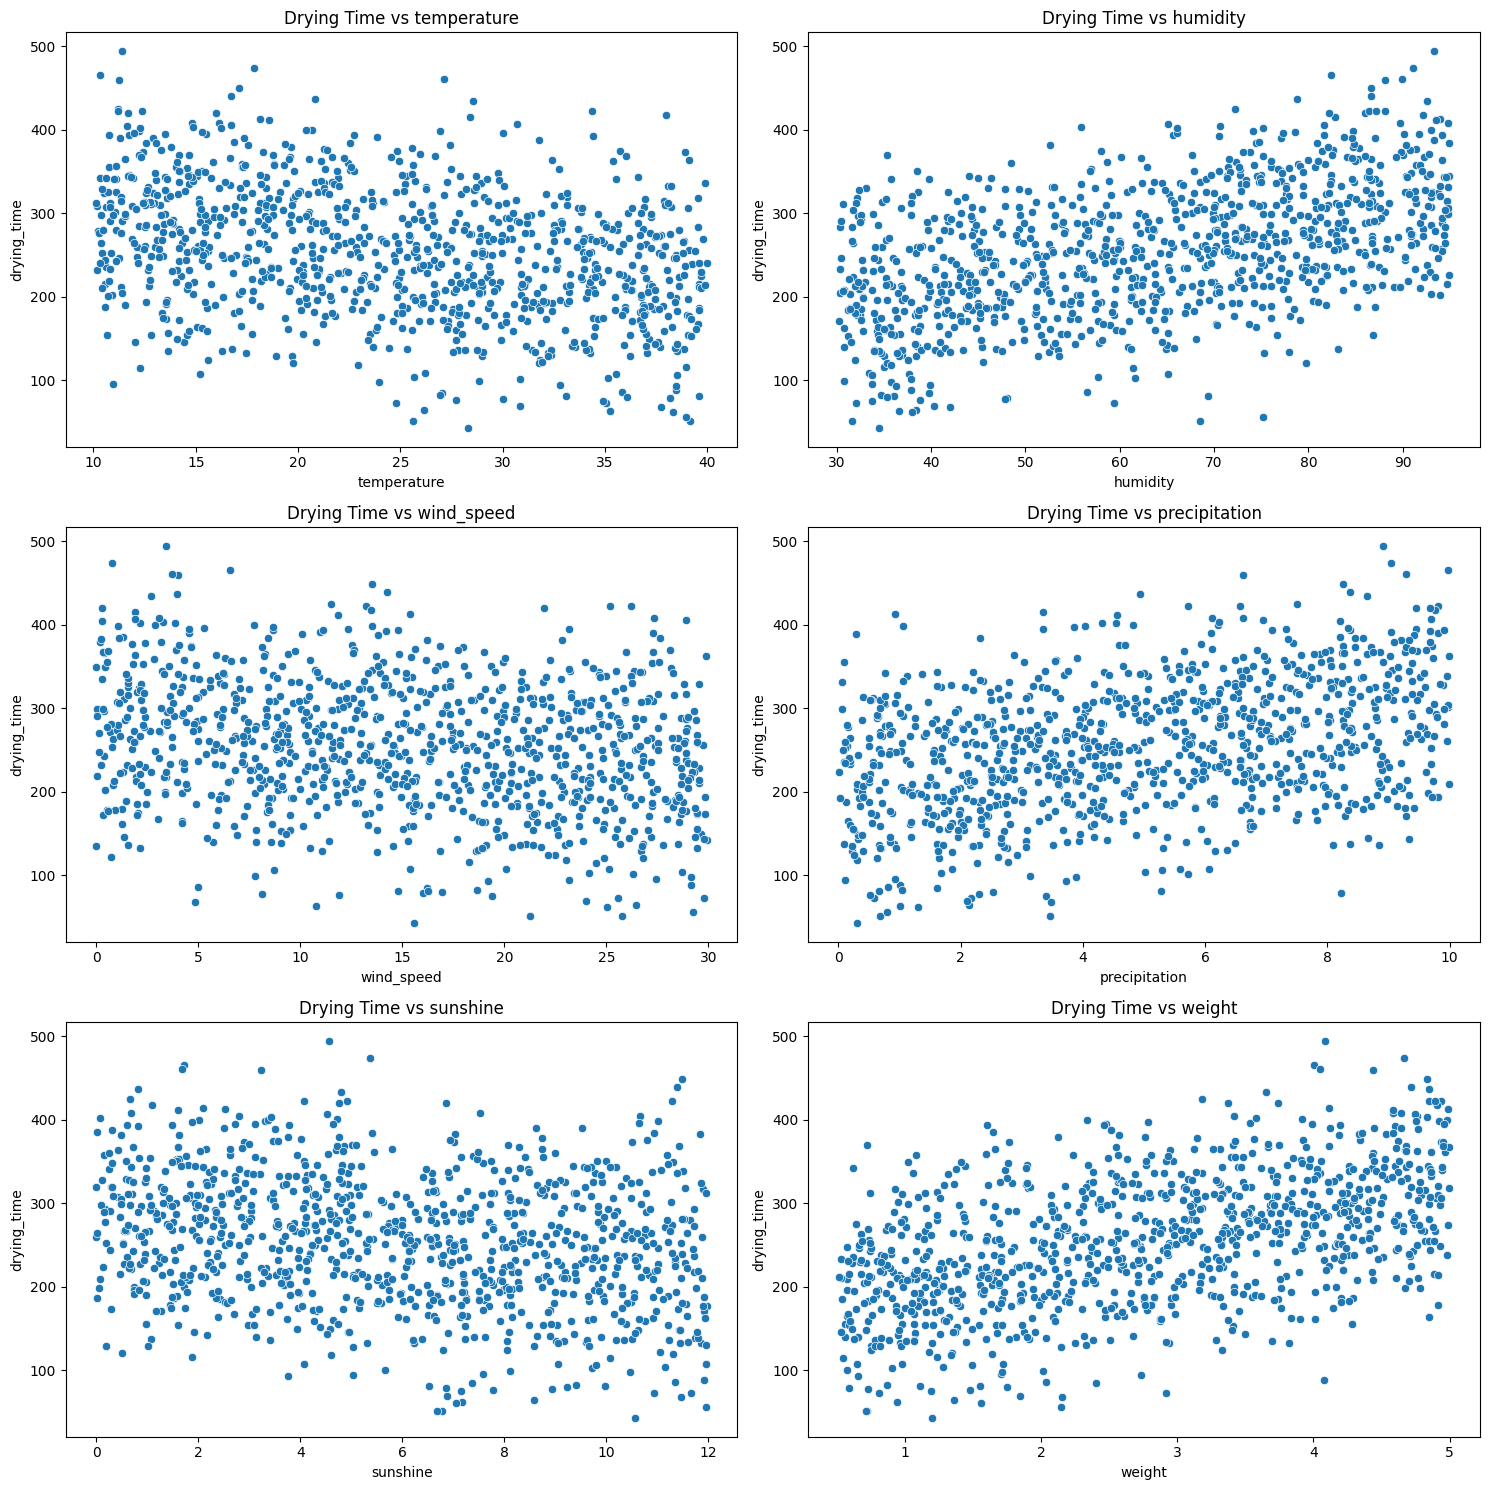

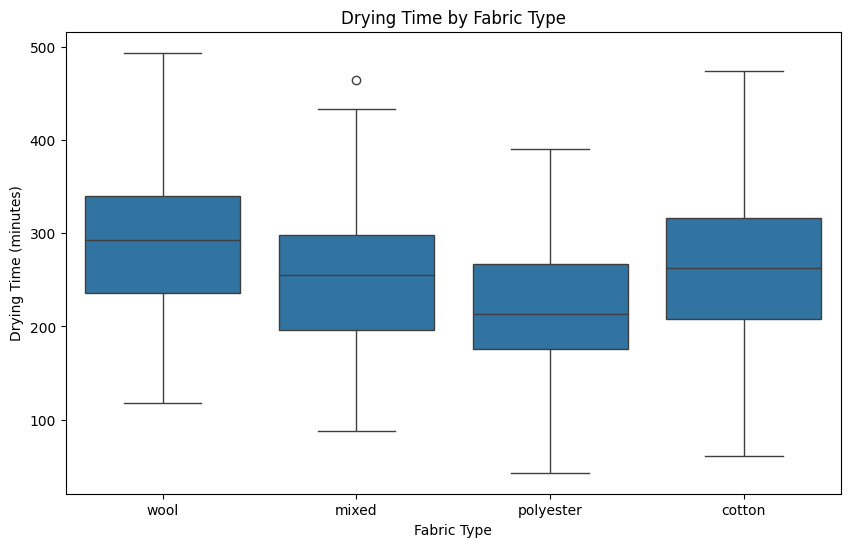

In [3]:


# Display basic information about the dataset
print("Dataset Information:")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1] - 1}")  # Excluding target variable
print("\nFeature Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize correlation between features
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Distribution of drying time
plt.figure(figsize=(10, 6))
sns.histplot(data['drying_time'], kde=True)
plt.title('Distribution of Clothes Drying Time')
plt.xlabel('Drying Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Relationships between features and target
feature_cols = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'sunshine', 'weight']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.scatterplot(x=col, y='drying_time', data=data, ax=axes[i])
    axes[i].set_title(f'Drying Time vs {col}')

plt.tight_layout()
plt.show()

# Box plot for drying time by fabric type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fabric', y='drying_time', data=data)
plt.title('Drying Time by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Drying Time (minutes)')
plt.show()

# 3. Data Preprocessing
# Split the data into features and target
X = data.drop('drying_time', axis=1)
y = data['drying_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'sunshine', 'weight']
categorical_features = ['fabric']

# Create preprocessing steps
numeric_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(drop='first')  # One-hot encode categorical features

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Linear Regression Performance Metrics:
Mean Squared Error (MSE): 202.29
Root Mean Squared Error (RMSE): 14.22
Mean Absolute Error (MAE): 11.26
R² Score: 0.9660


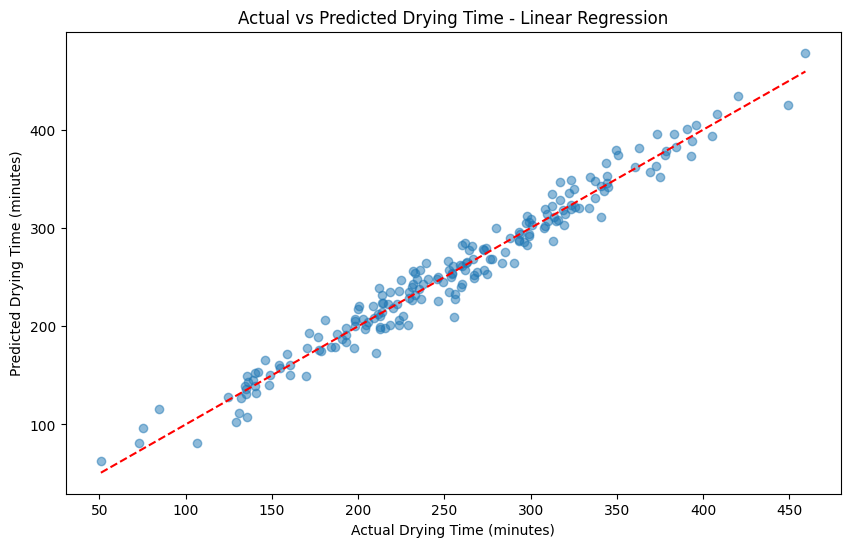


Random Forest Performance Metrics:
Mean Squared Error (MSE): 890.31
Root Mean Squared Error (RMSE): 29.84
Mean Absolute Error (MAE): 23.45
R² Score: 0.8505


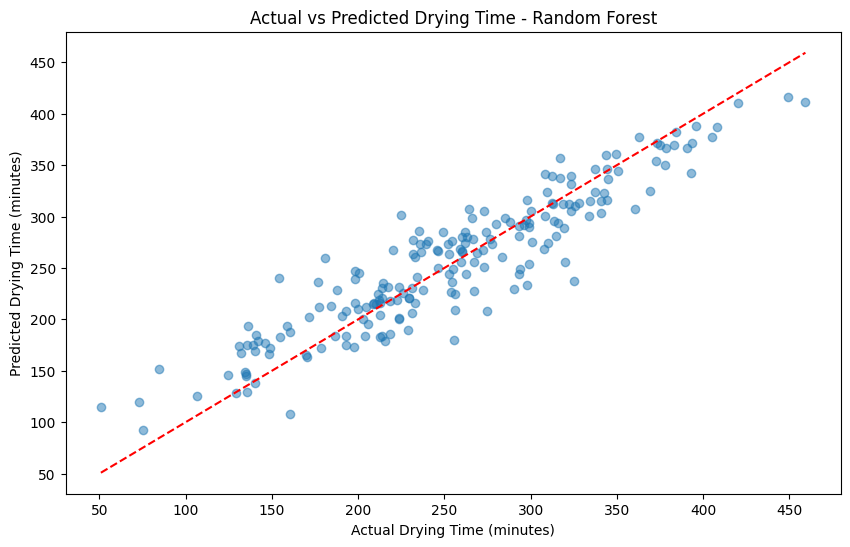


Gradient Boosting Performance Metrics:
Mean Squared Error (MSE): 402.89
Root Mean Squared Error (RMSE): 20.07
Mean Absolute Error (MAE): 15.94
R² Score: 0.9324


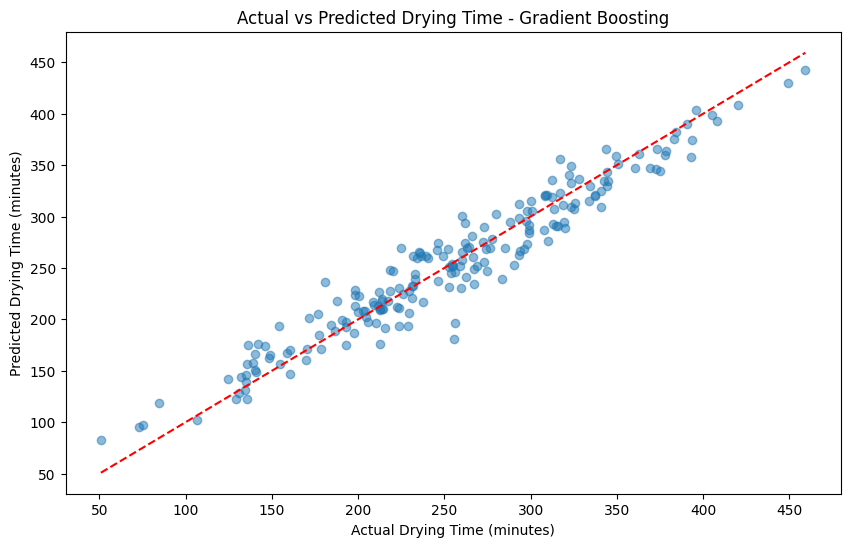

XGBoost not available, skipping this model


In [4]:
# 4. Model Building and Evaluation

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate the model and print performance metrics.

    Parameters:
    model: Trained model
    X_test: Test features
    y_test: Test target
    model_name (str): Name of the model

    Returns:
    dict: Dictionary of performance metrics
    """
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted Drying Time - {model_name}')
    plt.xlabel('Actual Drying Time (minutes)')
    plt.ylabel('Predicted Drying Time (minutes)')
    plt.show()

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

# Model 1: Linear Regression
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_pipeline.fit(X_train, y_train)
linear_metrics = evaluate_model(linear_pipeline, X_test, y_test, "Linear Regression")

# Model 2: Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")

# Model 3: Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

gb_pipeline.fit(X_train, y_train)
gb_metrics = evaluate_model(gb_pipeline, X_test, y_test, "Gradient Boosting")

# Try XGBoost if available
try:
    # Model 4: XGBoost Regressor
    xgb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(n_estimators=100, random_state=42))
    ])

    xgb_pipeline.fit(X_train, y_train)
    xgb_metrics = evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")
except:
    print("XGBoost not available, skipping this model")


Performing hyperparameter tuning for Random Forest...

Best Parameters:
{'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

Tuned Random Forest Performance Metrics:
Mean Squared Error (MSE): 879.48
Root Mean Squared Error (RMSE): 29.66
Mean Absolute Error (MAE): 23.26
R² Score: 0.8524


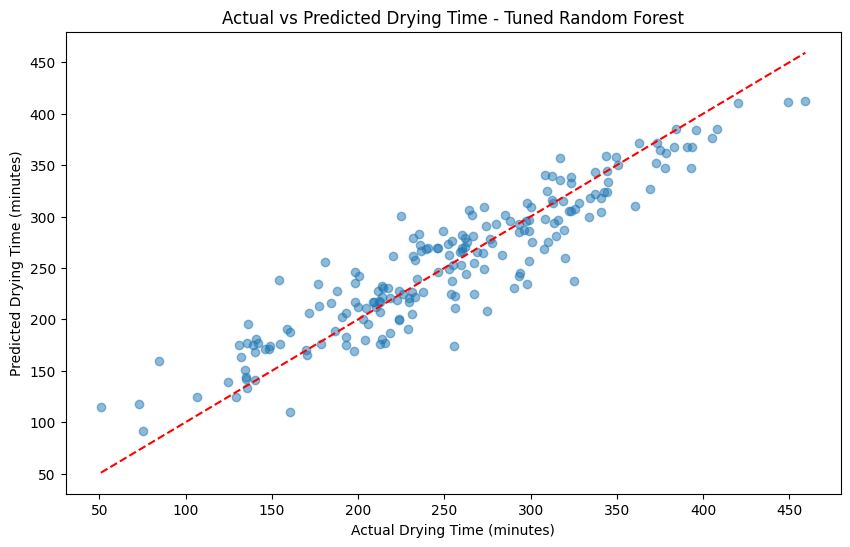

In [5]:
# 5. Hyperparameter Tuning for the Best Model
# Assuming Random Forest is our best model (adjust based on results)
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

print("\nPerforming hyperparameter tuning for Random Forest...")
grid_search.fit(X_train, y_train)

# Print best parameters
print("\nBest Parameters:")
print(grid_search.best_params_)

# Evaluate best model
best_rf_model = grid_search.best_estimator_
best_rf_metrics = evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest")


Feature Ranking:
1. weight (0.2798)
2. humidity (0.2678)
3. precipitation (0.1568)
4. temperature (0.1482)
5. sunshine (0.0586)
6. wind_speed (0.0481)
7. fabric_polyester (0.0213)
8. fabric_cotton (0.0165)
9. fabric_mixed (0.0029)


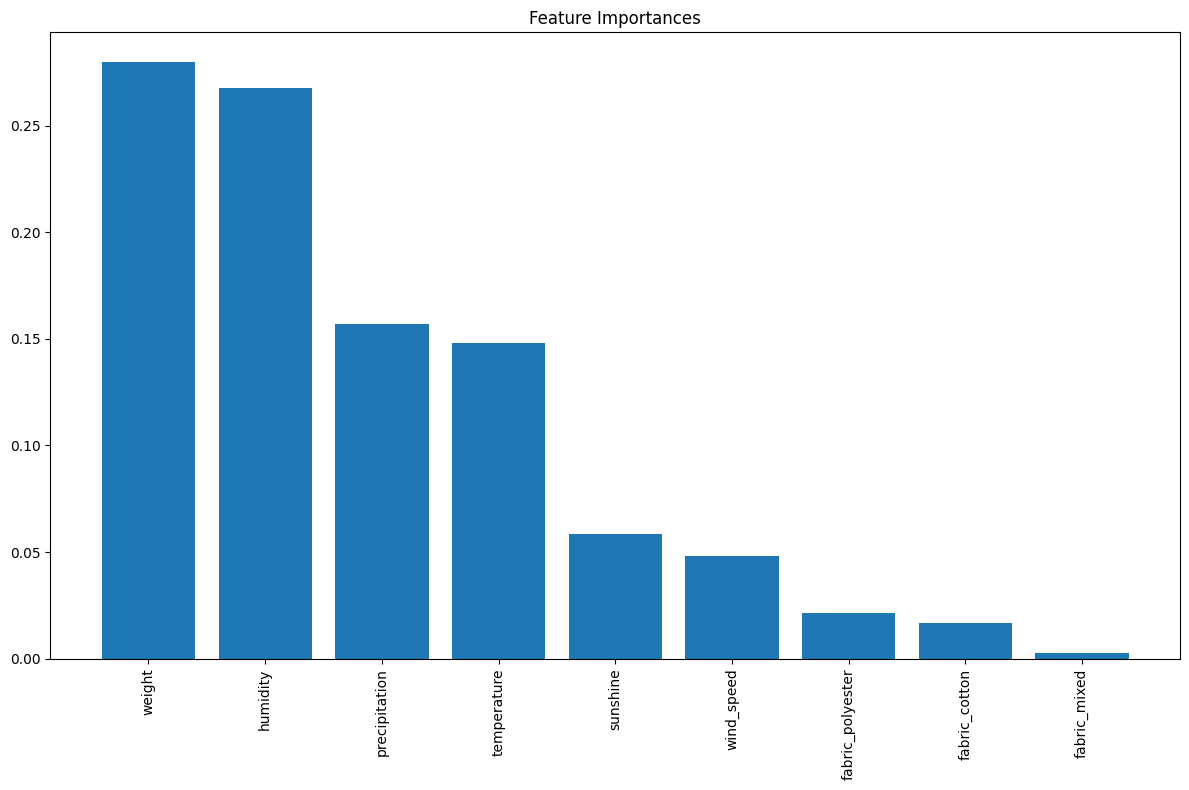

In [6]:
# 6. Feature Importance Analysis
# Get feature importance from the best model
if hasattr(best_rf_model.named_steps['regressor'], 'feature_importances_'):
    # Get feature names after preprocessing
    # For numeric features, names stay the same
    # For categorical features, we need to get the encoded feature names
    numeric_feature_names = numeric_features

    # Get one-hot encoded feature names for categorical features
    encoded_features = []
    for cat_feature in categorical_features:
        categories = list(X[cat_feature].unique())
        # Drop the first category (as we used drop='first' in OneHotEncoder)
        categories = categories[1:]
        encoded_features.extend([f"{cat_feature}_{cat}" for cat in categories])

    # Combine all feature names
    feature_names = numeric_feature_names + encoded_features

    # Get feature importances
    importances = best_rf_model.named_steps['regressor'].feature_importances_

    # Sort feature importances
    indices = np.argsort(importances)[::-1]

    # Print feature ranking
    print("\nFeature Ranking:")
    for i, idx in enumerate(indices):
        if i < len(feature_names):
            print(f"{i+1}. {feature_names[idx]} ({importances[idx]:.4f})")

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [7]:
cv_scores = cross_val_score(
    best_rf_model,
    X,
    y,
    cv=5,
    scoring='neg_mean_squared_error'
)

rmse_scores = np.sqrt(-cv_scores)
print("\nCross-Validation Results:")
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation: {rmse_scores.std():.2f}")


Cross-Validation Results:
RMSE scores: [28.00813006 30.80956064 31.85293599 30.53833044 30.71980751]
Mean RMSE: 30.39
Standard Deviation: 1.27


In [8]:
joblib.dump(best_rf_model, 'clothes_drying_time_predictor.joblib')
print("\nModel saved as 'clothes_drying_time_predictor.joblib'")

# 9. Function for Making Predictions with the Model
def predict_drying_time(model, weather_data):
    """
    Predict clothes drying time based on weather and clothes data.

    Parameters:
    model: Trained prediction model
    weather_data (dict): Dictionary containing weather and clothes information

    Returns:
    float: Predicted drying time in minutes
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([weather_data])

    # Make prediction
    predicted_time = model.predict(input_df)[0]

    return predicted_time

# Example usage
sample_data = {
    'temperature': 25,  # Temperature in Celsius
    'humidity': 60,     # Relative humidity in %
    'wind_speed': 10,   # Wind speed in km/h
    'precipitation': 0, # No rain
    'sunshine': 8,      # Hours of sunshine
    'fabric': 'cotton', # Type of fabric
    'weight': 2.5       # Weight of clothes in kg
}

# Load the model (in a real application)
# loaded_model = joblib.load('clothes_drying_time_predictor.joblib')

# Use the model we just trained
loaded_model = best_rf_model

# Predict drying time
predicted_time = predict_drying_time(loaded_model, sample_data)
print(f"\nPredicted drying time for the sample data: {predicted_time:.1f} minutes")


Model saved as 'clothes_drying_time_predictor.joblib'

Predicted drying time for the sample data: 200.5 minutes


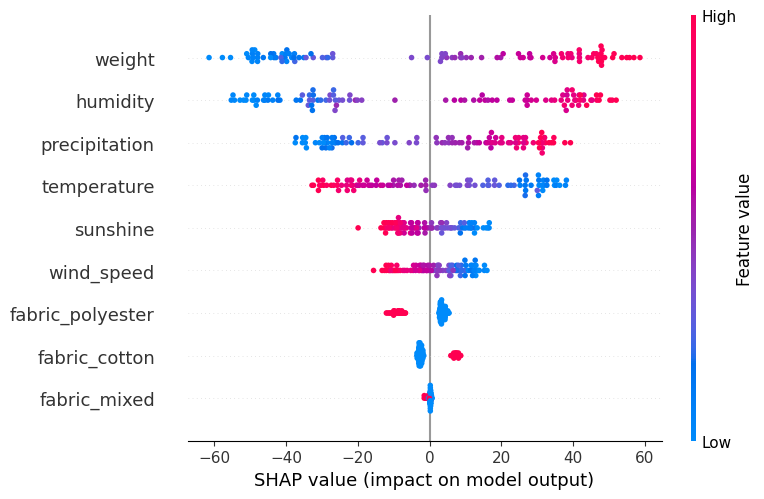

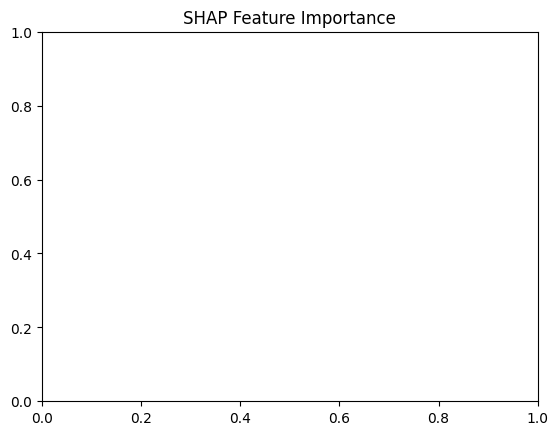

<Figure size 2000x300 with 0 Axes>

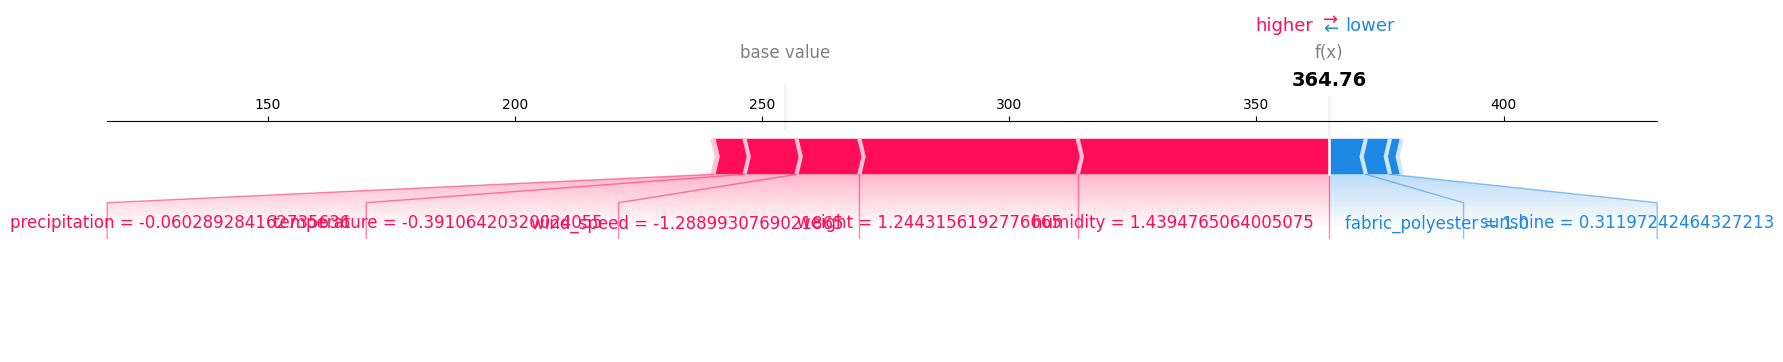

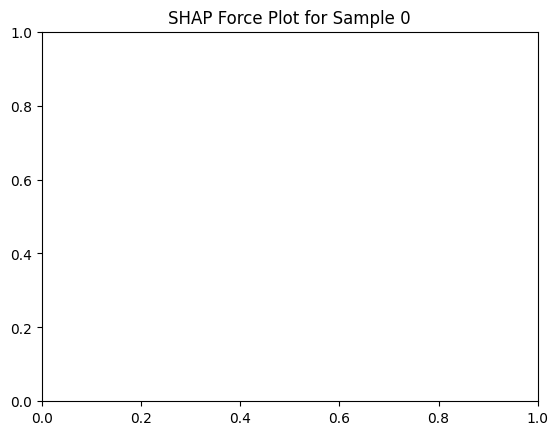

In [9]:
# 10. Create a Simple Function for End Users
def predict_drying_time_simple(temperature, humidity, wind_speed, precipitation,
                               sunshine, fabric, weight, model_path='clothes_drying_time_predictor.joblib'):
    """
    Simple function for predicting clothes drying time.

    Parameters:
    temperature (float): Temperature in Celsius
    humidity (float): Relative humidity in %
    wind_speed (float): Wind speed in km/h
    precipitation (float): Precipitation in mm
    sunshine (float): Hours of sunshine
    fabric (str): Type of fabric ('cotton', 'polyester', 'wool', 'mixed')
    weight (float): Weight of clothes in kg
    model_path (str): Path to the saved model

    Returns:
    float: Predicted drying time in minutes
    """
    # Load the model
    model = joblib.load(model_path)

    # Create input data
    input_data = {
        'temperature': temperature,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'precipitation': precipitation,
        'sunshine': sunshine,
        'fabric': fabric,
        'weight': weight
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Make prediction
    predicted_time = model.predict(input_df)[0]

    return predicted_time

# Example usage of the simple function
# predicted_time = predict_drying_time_simple(
#     temperature=25,
#     humidity=60,
#     wind_speed=10,
#     precipitation=0,
#     sunshine=8,
#     fabric='cotton',
#     weight=2.5,
#     model_path='clothes_drying_time_predictor.joblib'
# )
# print(f"Predicted drying time: {predicted_time:.1f} minutes")

# 11. Advanced: Model Interpretation with SHAP (if available)
try:
    import shap

    # Create a small sample for SHAP analysis
    X_sample = X_test.iloc[:100]  # Take a small subset for visualization

    # Preprocess the sample
    X_sample_preprocessed = preprocessor.transform(X_sample)

    # Create explainer for the best model
    explainer = shap.TreeExplainer(best_rf_model.named_steps['regressor'])

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_sample_preprocessed)

    # Visualize SHAP values
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample_preprocessed, feature_names=feature_names)
    plt.title("SHAP Feature Importance")
    plt.show()

    # Individual prediction explanation
    # Take the first test sample
    sample_idx = 0
    sample_preprocessed = preprocessor.transform(X_test.iloc[[sample_idx]])

    # Calculate SHAP values for the sample
    sample_shap_values = explainer.shap_values(sample_preprocessed)[0]

    # Plot force plot
    plt.figure(figsize=(20, 3))
    shap.force_plot(
        explainer.expected_value,
        sample_shap_values,
        X_sample_preprocessed[0,:],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.title(f"SHAP Force Plot for Sample {sample_idx}")
    plt.show()

except ImportError:
    print("\nSHAP library not available. Skipping model interpretation part.")
    print("To use SHAP for model interpretation, install it with: pip install shap")